# Cone distribution

In this notebook we create a cone distribution, which has the following density,

$$p(x) \propto \text{exp}(-|x|^\beta),$$

where $\beta > 0$ and $|x|$ is the Euclidean norm of the d-dimensional $x$. This distribution was created due to its long tails, for its use in testing MCMC algorithms.

Plotting a two-dimensional version of this function with $\beta=1$.

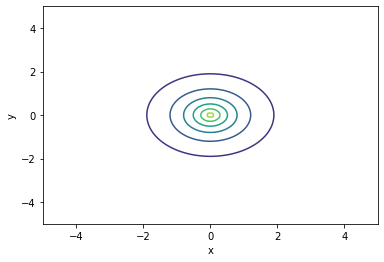

In [1]:
import pints
import pints.toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf (default is 2-dimensional with beta=1)
log_pdf = pints.toy.ConeLogPDF()

# Contour plot of pdf
num_points = 100
x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Generate independent samples from this distribution and plot them

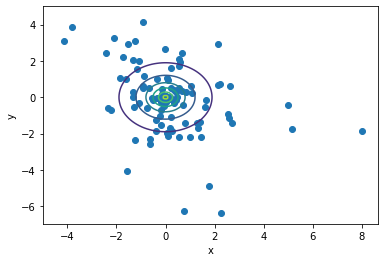

In [2]:
samples = log_pdf.sample(100)

num_points = 100
x = np.linspace(-5, 5, num_points)
y = np.linspace(-5, 5, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
d = map(lambda x: np.linalg.norm(x), samples)

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean dim 1', 'mean dim 2'])
print(results)

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!
param       mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
----------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
mean dim 1  0.10    1.73    -3.43   -0.86  0.17   1.08   3.68     1.00    1025.15  541.84
mean dim 2  0.20    1.87    -3.59   -0.88  0.11   1.19   4.33     1.01    625.80   330.76


Scatter plot of the samples. Adaptive covariance MCMC seems to do ok at sampling from this distribution.

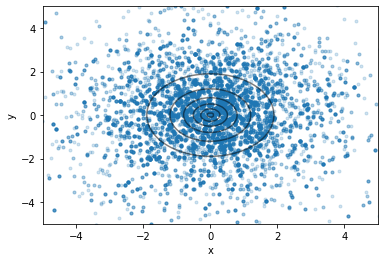

In [4]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4-dimensional cone

Now creating a 4 dimensional cone with $\beta=1$, then using Adaptive covariance MCMC to sample from it.

In [5]:
log_pdf = pints.toy.ConeLogPDF(dimensions=4)

# Create an adaptive covariance MCMC routine
x0 = np.zeros(log_pdf.n_parameters()) + np.random.normal(0, 1, size=(4, log_pdf.n_parameters()))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(8000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean dim 1', 'mean dim 2', 'mean dim 3', 'mean dim 4'])
print(results)

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!
param       mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess      ess per sec.
----------  ------  ------  ------  -----  -----  -----  -------  ------  -------  --------------
mean dim 1  0.00    2.04    -4.04   -1.28  -0.01  1.26   4.21     1.00    2059.16  502.44
mean dim 2  0.03    2.04    -4.07   -1.18  0.03   1.24   4.18     1.00    1800.27  439.27
mean dim 3  0.02    2.07    -4.12   -1.27  0.06   1.25   4.41     1.00    2095.97  511.43
mean dim 4  0.03    2.04    -4.14   -1.21  0.05   1.26   4.14     1.00    1965.68  479.63


Compare the theoretical mean and variance of the normed distance from the origin with the sample-based estimates -- MCMC tends to understate these since it struggles to reach tails

In [6]:
chain = np.vstack(chains)
d = list(map(lambda x: np.linalg.norm(x), chain))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

True normed mean = 4.0
Sample normed mean = 3.8085163535764845
True normed var = 4.0
Sample normed var = 3.0518452121804467


## Longer tailed cone

Create a cone with $\beta=0.4$.

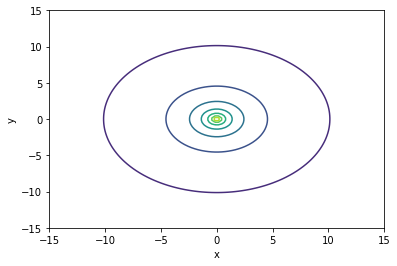

In [7]:
# Create log pdf
log_pdf = pints.toy.ConeLogPDF(dimensions=2, beta=0.4)

# Contour plot of pdf
num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Adaptive covariance MCMC finds it harder to efficiently sample from this distribution.

Running...
Done!
param       mean    std.    2.5%     25%     50%    75%    97.5%    rhat    ess      ess per sec.
----------  ------  ------  -------  ------  -----  -----  -------  ------  -------  --------------
mean dim 1  -0.38   74.71   -167.37  -26.65  0.80   24.45  153.16   1.00    1300.54  686.31
mean dim 2  1.99    76.59   -148.60  -23.43  3.07   27.80  164.92   1.00    1295.47  683.64


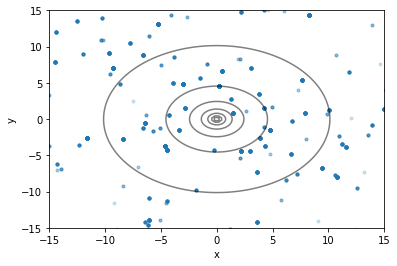

True normed mean = 77.96892940824118
Sample normed mean = 72.78557228131051
True normed var = 9040.846046932704
Sample normed var = 6144.771837547526


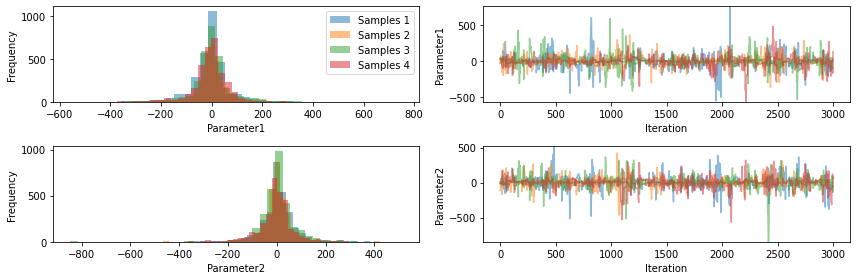

In [8]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.HaarioBardenetACMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean dim 1', 'mean dim 2'])
print(results)

# Discard warm-up
chains = [chain[1000:] for chain in chains]
stacked = np.vstack(chains)

plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d = list(map(lambda x: np.linalg.norm(x), stacked))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

Try Hamiltonian Monte Carlo on this problem. Chains mix with themselves much better than for adaptive covariance although also struggles to efficiently explore the tails.

Running...
Done!
param       mean    std.    2.5%     25%     50%    75%    97.5%    rhat    ess     ess per sec.
----------  ------  ------  -------  ------  -----  -----  -------  ------  ------  --------------
mean dim 1  -2.53   56.06   -136.07  -24.35  -0.77  21.52  112.30   1.00    409.82  38.68
mean dim 2  -1.53   62.24   -133.42  -25.41  -0.86  20.72  127.12   1.00    468.43  44.22


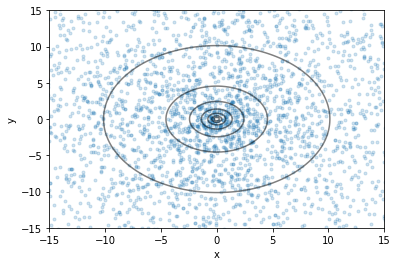

True normed mean = 77.96892940824118
Sample normed mean = 63.106114649617034
True normed var = 9040.846046932704
Sample normed var = 3729.998460878783


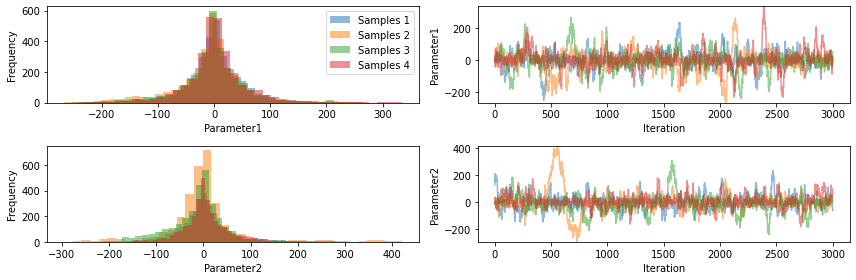

In [9]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
sigma0 = np.repeat(10, 4)
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.HamiltonianMCMC, sigma0=sigma0)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(), parameter_names=['mean dim 1', 'mean dim 2'])
print(results)

# Discard warm-up
chains = [chain[1000:] for chain in chains]
stacked = np.vstack(chains)

plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d = list(map(lambda x: np.linalg.norm(x), stacked))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

# Show traces and histograms
pints.plot.trace(chains)
plt.show()